# Lenia

Resources
- https://en.wikipedia.org/wiki/Lenia
- https://www.youtube.com/watch?v=7-97RhAZhXI

![Steps](lenia-steps.png)

growth mapping $G : [ 0 , 1 ] → [ − 1 , 1 ] $

In [1]:
import numpy as np
from scipy.signal import fftconvolve
from skimage.draw import disk, rectangle
import matplotlib.pyplot as plt

In [3]:
def exp_growth(potential, mu=1, sigma=1):
    exponent = -np.power(potential - mu, 2)/(2*sigma**2)
    return 2*np.exp(exponent) - 1

def polynomial_growth(potential, alpha=4, mu=1, sigma=1):
    clipped = np.clip(potential, mu - 3*sigma, mu + 3*sigma)
    frac = np.power(potential - mu, 2)/(9*sigma**2)
    return 2*clipped*np.power(1 - frac, alpha) - 1

def rect_growth(potential, mu=0.35, sigma=0.07):
    """Default for Conway's Game of Life"""
    return 2*np.clip(potential, mu-sigma, mu+sigma) - 1

In [38]:
world_size = (1000, 1000)
center = np.array(world_size)/2
print(center.astype(int))

world = np.zeros(world_size, dtype=np.uint8)
r, c = rectangle(start=center, extent=(150,150), shape=world.shape)
r, c = 
world[r, c.astype(int)] = 1

kernel_size = np.array((200, 200))
r1, c1 = disk(kernel_size/2, 100) # outer radius
r2, c2 = disk(kernel_size/2, 50) # inner radius
kernel = np.zeros(kernel_size, dtype=np.uint8)
kernel[r1, c1] = 1
kernel[r2, c2] = 0
kernel = kernel / np.sum(kernel) # normalization

potential = fftconvolve(world, kernel, mode='same')

field = exp_growth(potential)

[500 500]


AttributeError: 'list' object has no attribute 'astype'

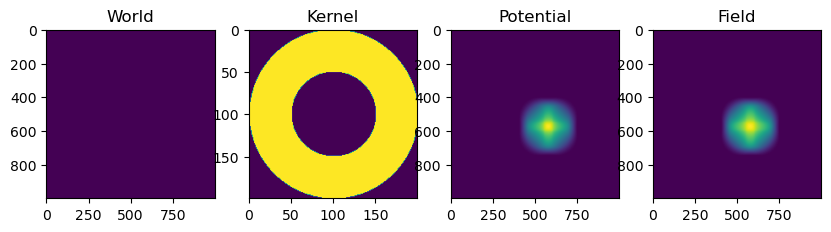

In [39]:
plt.figure(figsize=(10,5))
plt.subplot(141)
plt.title("World")
plt.imshow(world)

plt.subplot(142)
plt.title("Kernel")
plt.imshow(kernel)

plt.subplot(143)
plt.title("Potential")
plt.imshow(potential)

plt.subplot(144)
plt.title("Field")
plt.imshow(field)